In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.pandas.set_option('display.max_columns',None)
df_train=pd.read_csv('train.csv')
X_train,X_test, y_train,y_test=train_test_split(df_train, df_train['SalePrice'],test_size=.1,random_state=0)
del df_train['Id']
print(df_train.shape)
df_train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data exploration

#### Columns with Missing values

In [342]:
for col in df_train.columns:
    if(int(df_train[col].isnull().sum())!=0):
        print("{} : {}% ".format(col,np.round(df_train[col].isnull().sum()/df_train.shape[0]*100,2)))

LotFrontage : 17.74% 
Alley : 93.77% 
MasVnrType : 0.55% 
MasVnrArea : 0.55% 
BsmtQual : 2.53% 
BsmtCond : 2.53% 
BsmtExposure : 2.6% 
BsmtFinType1 : 2.53% 
BsmtFinType2 : 2.6% 
Electrical : 0.07% 
FireplaceQu : 47.26% 
GarageType : 5.55% 
GarageYrBlt : 5.55% 
GarageFinish : 5.55% 
GarageQual : 5.55% 
GarageCond : 5.55% 
PoolQC : 99.52% 
Fence : 80.75% 
MiscFeature : 96.3% 


#### Number of columns with numerical and categorical values

In [354]:
categorical_features= [feature for feature in df_train.columns if df_train[feature].dtype=='O']
numerical_features= [feature for feature in df_train.columns if df[feature].dtype!='O']

print("Categorical features : {}".format(len(categorical_features)))
print("Numerical features : {}".format(len(numerical_features)))



Categorical features : 43
Numerical features : 37


#### How many of numerical variables are discrete and continous

In [355]:
discrete_features=[feature for feature in numerical_features if (len(pd.unique(df_train[feature]))<25 and 'Yr' not in feature and 'Year' not in feature)]
print("Discrete features: {}".format(len(discrete_features)))
continuous_features=[feature for feature in numerical_features if (feature not in discrete_features and 'Yr' not in feature and 'Year' not in feature)]
print("Continuous features: {}".format(len(continuous_features)))

Discrete features: 17
Continuous features: 16


#### Date variables 

In [345]:
year_feature = [feature for feature in df_train.columns if 'Year' in feature or 'Yr' in feature ]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Features with high correlations with SalePrice

In [346]:
important_features=[feature for feature in df.corr()['SalePrice'].index if df.corr()['SalePrice'][feature]>.5 and feature !='SalePrice']
for feature in important_features:
    print("{} : {}".format(feature,round(df.corr()['SalePrice'][feature],2)))
    

OverallQual : 0.79
YearBuilt : 0.52
YearRemodAdd : 0.51
TotalBsmtSF : 0.61
1stFlrSF : 0.61
GrLivArea : 0.71
FullBath : 0.56
TotRmsAbvGrd : 0.53
GarageCars : 0.64
GarageArea : 0.62


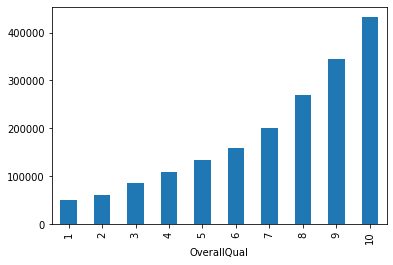

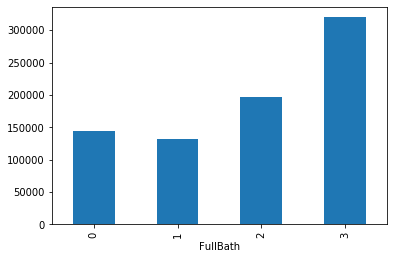

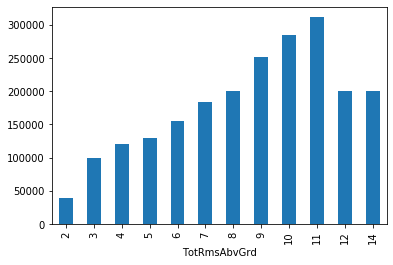

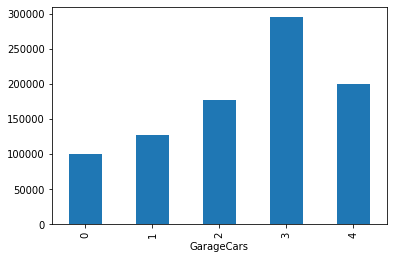

In [347]:
for feature in important_features:
    if(feature in discrete_features):
        df_train.groupby(feature)['SalePrice'].median().index,df_train.groupby(feature)['SalePrice'].median().plot.bar()
        plt.show()

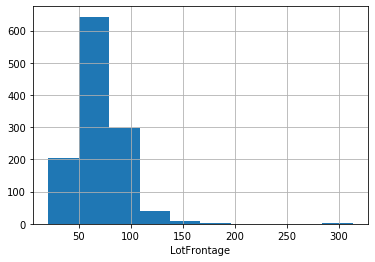

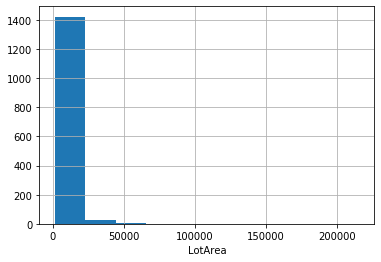

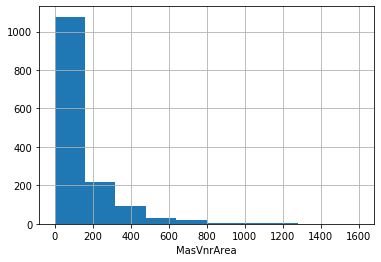

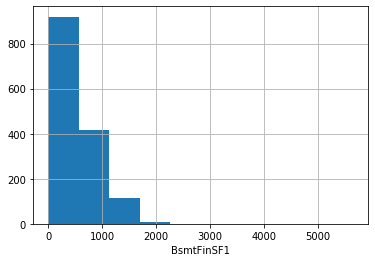

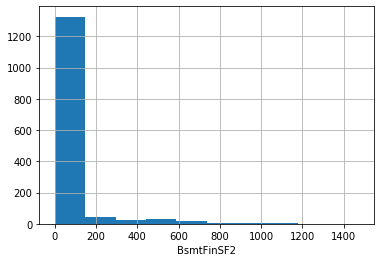

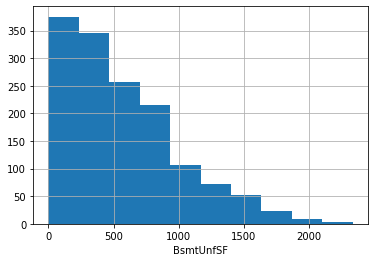

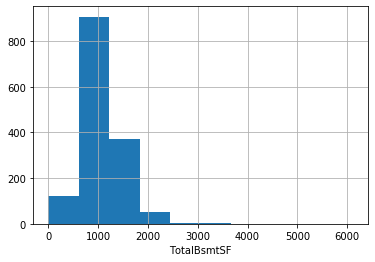

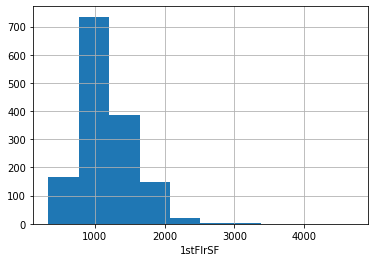

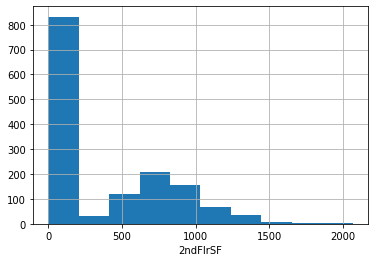

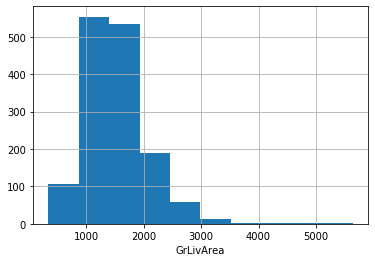

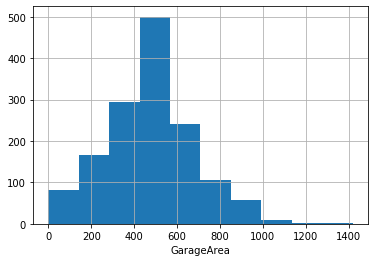

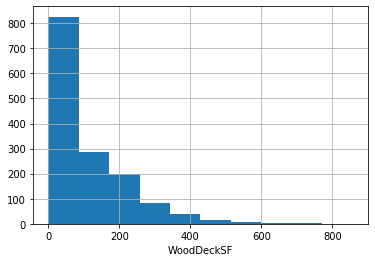

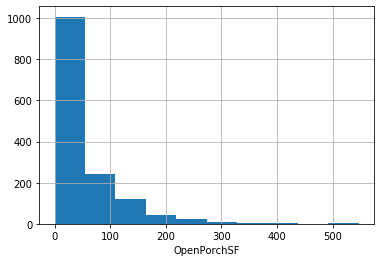

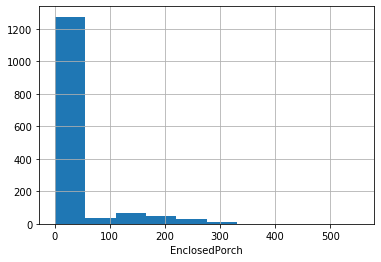

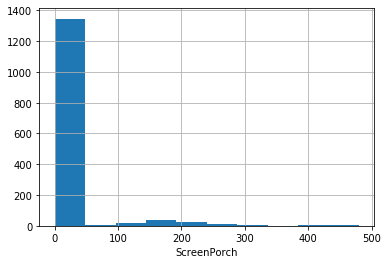

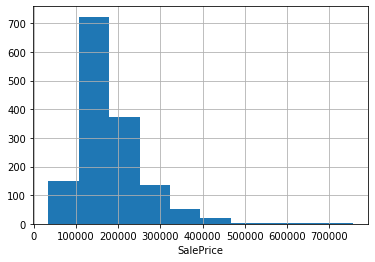

In [348]:
for feature in continuous_features:
    df_train[feature].hist()
    plt.xlabel(feature)
    plt.show()
    
df_copy=df_train.copy()


#### Count of sparse values

In [357]:
for feature in categorical_features:
    print("\n{}".format(feature))
    for unique_value in(df_train[feature].unique()):
        print("{}:{}".format(unique_value,df_train[df_train[feature]==unique_value].shape[0]))
        
        
# print("{} : {}".format(unique_value,df[df[unique_value]==unique_value].shape[0]))


MSZoning
RL:1151
RM:218
C (all):10
FV:65
RH:16

Street
Pave:1454
Grvl:6

Alley
missing:1369
Grvl:50
Pave:41

LotShape
Reg:925
IR1:484
IR2:41
IR3:10

LandContour
Lvl:1311
Bnk:63
Low:36
HLS:50

Utilities
AllPub:1459
NoSeWa:1

LotConfig
Inside:1052
FR2:47
Corner:263
CulDSac:94
FR3:4

LandSlope
Gtl:1382
Mod:65
Sev:13

Neighborhood
CollgCr:150
Veenker:11
Crawfor:51
NoRidge:41
Mitchel:49
Somerst:86
NWAmes:73
OldTown:113
BrkSide:58
Sawyer:74
NridgHt:77
NAmes:225
SawyerW:59
IDOTRR:37
MeadowV:17
Edwards:100
Timber:38
Gilbert:79
StoneBr:25
ClearCr:28
NPkVill:9
Blmngtn:17
BrDale:16
SWISU:25
Blueste:2

Condition1
Norm:1260
Feedr:81
PosN:19
Artery:48
RRAe:11
RRNn:5
RRAn:26
PosA:8
RRNe:2

Condition2
Norm:1445
Artery:2
RRNn:2
Feedr:6
PosN:2
PosA:1
RRAn:1
RRAe:1

BldgType
1Fam:1220
2fmCon:31
Duplex:52
TwnhsE:114
Twnhs:43

HouseStyle
2Story:445
1Story:726
1.5Fin:154
1.5Unf:14
SFoyer:37
SLvl:65
2.5Unf:11
2.5Fin:8

RoofStyle
Gable:1141
Hip:286
Gambrel:11
Mansard:7
Flat:13
Shed:2

RoofMatl
CompShg:1434
W

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df=pd.read_csv('Data/titanic_train.csv')
df.head(10)

print(df.isnull().sum())
sns.heatmap(df.isnull())
df.info()


df.groupby('Sex')['Survived'].value_counts()

sns.countplot('Survived',data=df,hue='Sex')

plt.pie(df[df['Sex']=='male']['Survived'].value_counts(),autopct='%1.1f%%',labels=['Did not survive','Survived'])


plt.pie(df[df['Sex']=='female']['Survived'].value_counts(),autopct='%1.1f%%',labels=['Survived','Did not survive'])

df.groupby('Pclass').count()['Survived']

plt.pie(df.groupby('Pclass').count()['Survived'].values,autopct='%1.1f%%',labels=df.groupby('Pclass').count()['Survived'].index)

